In [1]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '비밀번호 txt로 옮김'
# !git push

# !pip install colab-ssh
!pip install -Uqq fastbook

BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/fastai-practice'

     |████████████████████████████████| 720 kB 8.5 MB/s 
     |████████████████████████████████| 1.2 MB 56.1 MB/s 
     |████████████████████████████████| 48 kB 6.2 MB/s 
     |████████████████████████████████| 189 kB 60.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 51 kB 351 kB/s 
     |████████████████████████████████| 558 kB 54.0 MB/s 
     |████████████████████████████████| 130 kB 53.5 MB/s 


In [2]:
f = open(f"{BASE_DIR}/azure_key.txt", 'r')
AZURE_TOKEN = f.read()
f.close()

# f = open(f"{BASE_DIR}/ngrok_key.txt", 'r')
# NGROK_TOKEN = f.read()
# f.close()
# PASSWORD = '1234'
# from colab_ssh import launch_ssh
# launch_ssh(NGROK_TOKEN, PASSWORD)

In [3]:
import fastbook
from fastai.vision.all import *
# from fastai.vision.widgets import *
# fastbook.setup_book() # to connect the colab notebook to google drive using an authentication token

In [4]:
import requests

def search_images_bing(key, term, min_sz=128, max_images=150):    
     params = {'q':term, 'count':max_images, 'min_height':min_sz, 'min_width':min_sz}
     headers = {"Ocp-Apim-Subscription-Key":AZURE_TOKEN}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [5]:
results = search_images_bing(AZURE_TOKEN, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [6]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [7]:
!pip install filetype

In [ ]:
from PIL import Image
import urllib.request
import filetype

if not path.exists():
    path.mkdir()

def check_img(o):
    try:
        urllib.request.urlretrieve(o, 'img.png')
    except:
        return False
    return filetype.is_image('img.png')

for o in bear_types:
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(AZURE_TOKEN, f'{o} bear')
    print(results.attrgot('contentUrl').filter(lambda o: check_img(o)))
    download_images(dest, urls=results.attrgot('contentUrl'))

bears/grizzly
['http://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg', 'https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg', 'https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-1240x823.jpg', 'https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg', 'https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg', 'https://media.spokesman.com/photos/2017/11/30/Yellowstone_Grizzlies.JPG.jpg', 'https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg', 'https://www.alloutdoor.com/wp-content/uploads/2019/08/Grizzly_Bear_Ursus_arctos_ssp..jpg', 'https://wildlifeimages.org/wp-content/uploads/2016/09/DSC1704.jpg', 'https://i2.wp.com/nypost.com/wp-content/uploads/sites/2/2020/09/grizzly-bear-89.jpg?quality=90&strip=all&ssl=1', 'https://www.conservationnw.org/wp-content/uploads/2017/10/grizzly-bears-1280x950.jpg', 'https://i0.wp.com/www.commonsenseevaluation.com/wp-content/uploads/2013/0

In [ ]:
fns = get_image_files(path)
fns

(#440) [Path('bears/black/00000091.jpg'),Path('bears/black/00000070.jpg'),Path('bears/black/00000127.jpg'),Path('bears/black/00000048.jpg'),Path('bears/black/00000124.jpg'),Path('bears/black/00000128.jpg'),Path('bears/black/00000054.jpg'),Path('bears/black/00000106.jpg'),Path('bears/black/00000046.JPG'),Path('bears/black/00000023.jpg')...]

In [ ]:
path

Path('bears')

In [ ]:
fns = [f for f in fns if f.exists()]
bears = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(128)) # default resize method: crop

In [ ]:
dls = bears.dataloaders(path)
dls

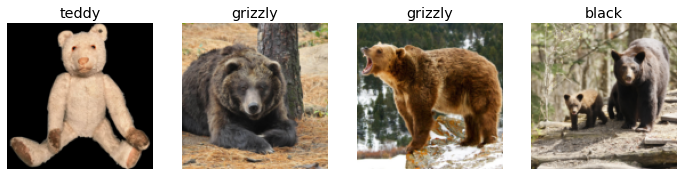

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)


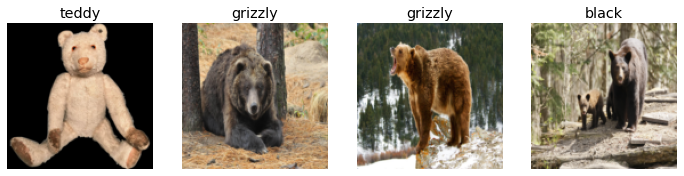

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

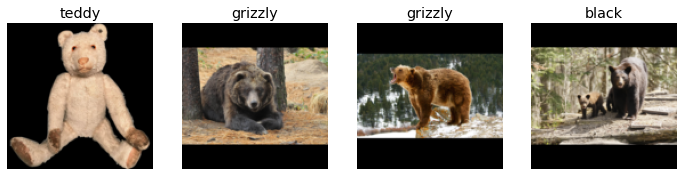

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

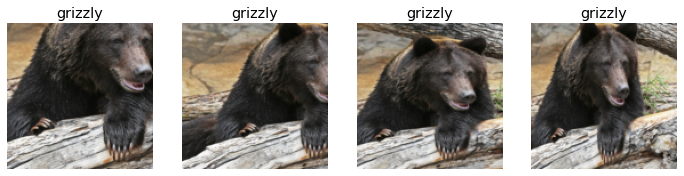

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


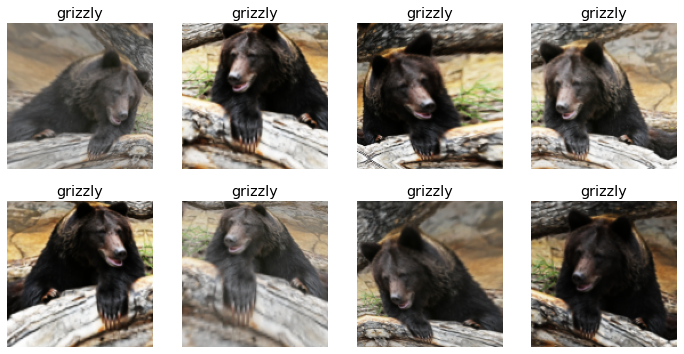

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)